# Relashinships using DAX

## CROSSFILTER
When there are tables that are not properly related to one another to answer a business question, they can be joined using CROSSFILTER.
![Alt text](crossfilter_model.png)

In the example above, sales table is related to both sales terittory and reseller tables but in one direction. For that reason, reseller and sales teritory tables can't filter one another. 

This can be fixed by adjustng the relationship between sales teritory and sales table manually two be bi-directional or it can be done using DAX as follows while calculating reseller count:

Reseller Count = CALCULATE(COUNT(Reseller[Reseller ID]),CROSSFILTER(Reseller[ResellerKey],Sales[ResellerKey],Both))


![Alt text](crossfilter_result.png)

There are two reseller count columns. The first is not counting it properly since reseller ID is counted and it is not showing correct result since it is not related to reseller terittory table. Reseller Count is properly calculated by the DAX code written above and hence it is showing the result correctly.

## ISFILTERED and ISCROSSFILTERED

General Guidance Irrespective of Direction of Relationship: single or both. See Figures for scenarios
ISFILTERED returns TRUE when a value is being filtered directly by a value in a table or a slicer.
ISCROSSFILTERED returns TRUE when a value is being filtered by a value in a table or a slicer across a table. In the example below, the relationship between reseller and sales table is bidirectional and ISCROSSFILTERED returns TRUE since cusomerkey and ISCROSSFILTERED columns are found in different tables. ISFILTERED returned FALSE since the column is found in a different table.
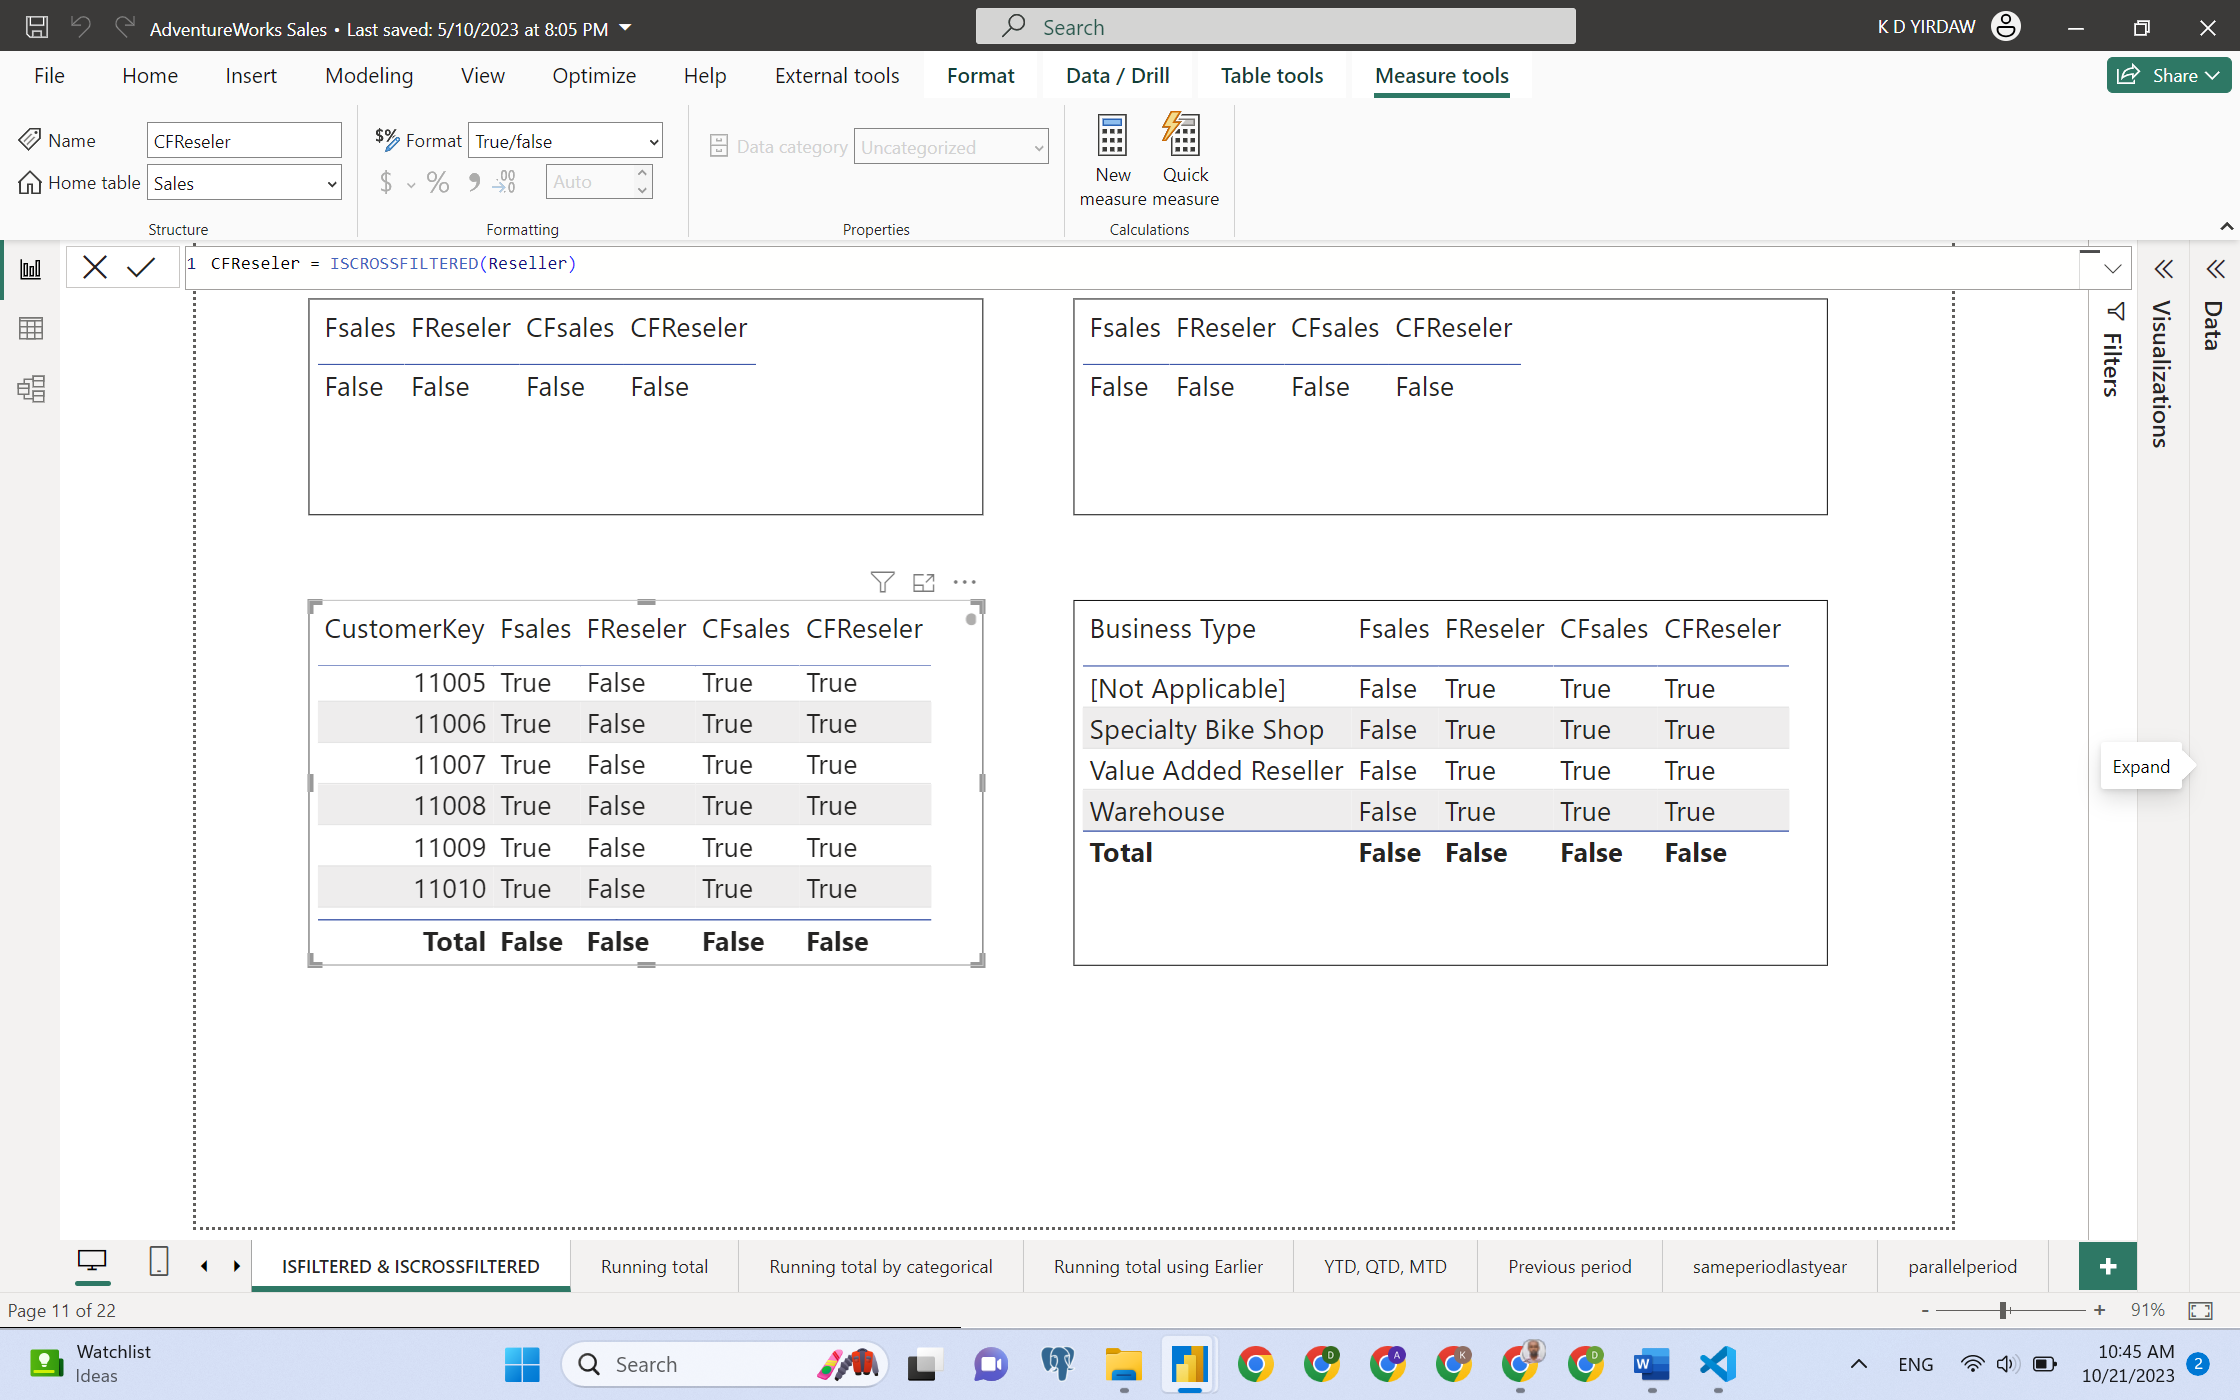

However, when the bidirectional relationship is severed and only reseller table filters sales table, there is no crossfiltering happening and hence as seen below, ISCROSSFILTERED is FALSE
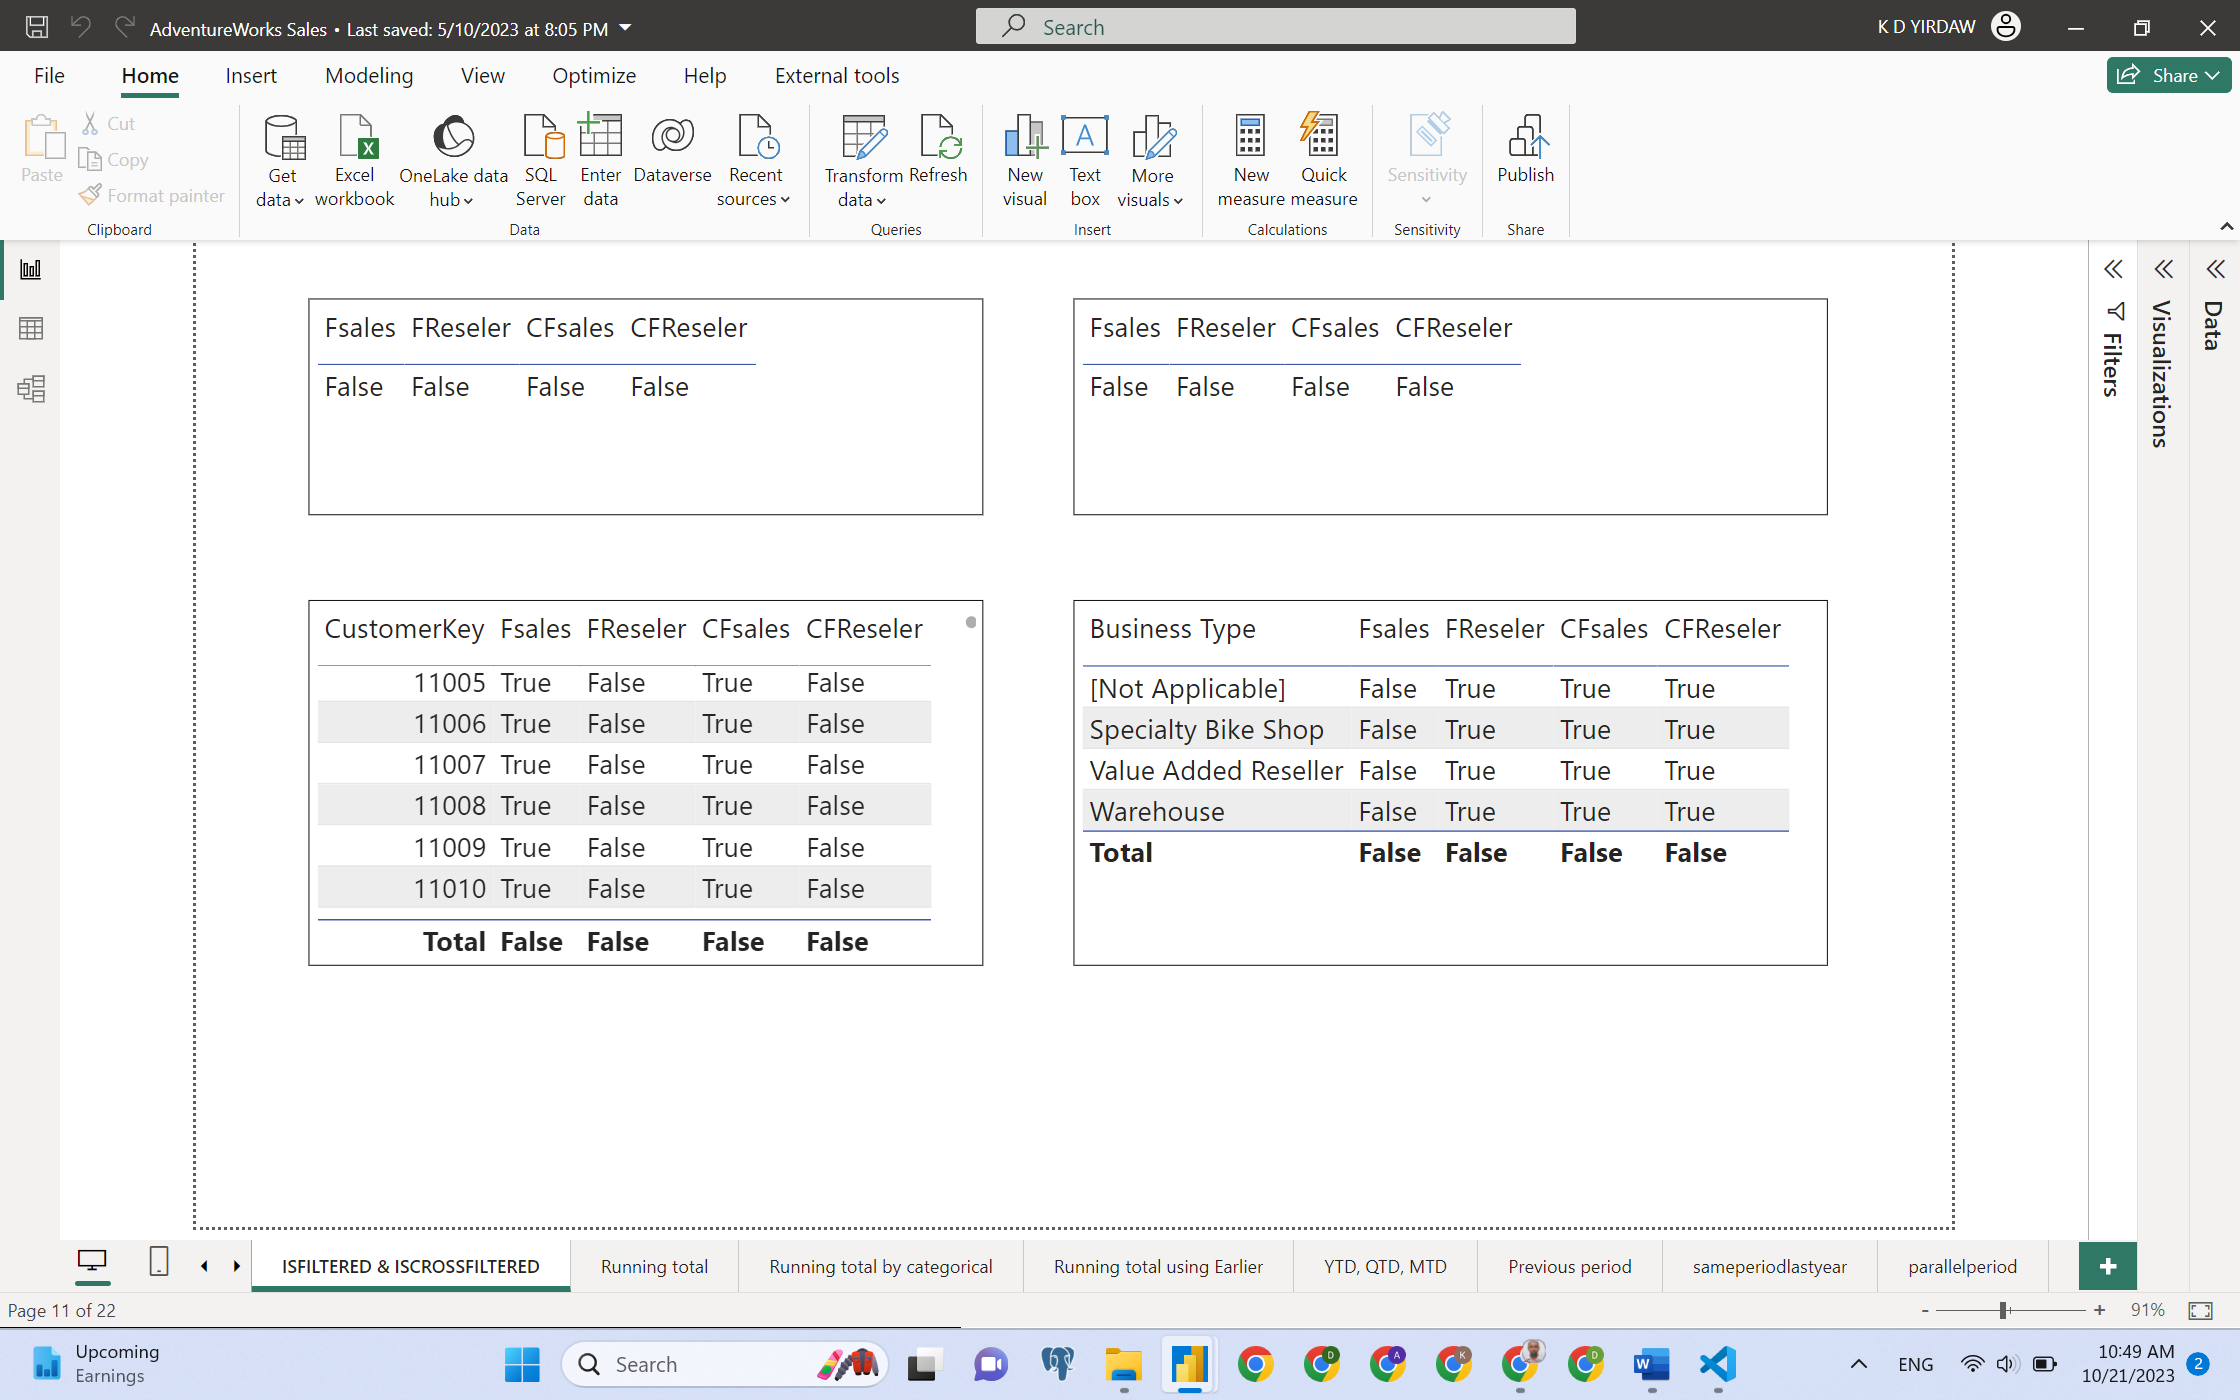

# Application of ISFILTERED and ISCROSSFILTERED
They are used to modify outputs using conditional statements when there is a filtered value

sales_datesinperiod = 
IF(ISFILTERED('Date'[Date]),CALCULATE(
    SUM(Sales[Sales Amount]),
    DATESINPERIOD(
        'Date'[Date],
        MAX('Date'[Date]),
        -1,
        YEAR
    )
),"Select Date")


> This will show __'Select Date'__ if filter is not selected. If so, sales total for the past 1 year is shown